## Dropping Columns

Link-https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day35-complete-case-analysis/day35.ipynb
Complete case Anaysis means analysing data for those column where complete data is present no missing valuyes
its called CCA when values in any column are missing

Assumption-

1.Data is randomally Missing 
2.if only less than 5% of data

Advatages-1.easy to implement
2.Preserve variable distribution

Disadvatages-1.lose data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science.csv')


In [3]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100


enrollee_id                0.000000
city                       0.000000
city_development_index     5.357143
gender                    30.357143
relevent_experience        0.000000
enrolled_university        3.571429
education_level            3.571429
major_discipline          17.857143
experience                 0.000000
company_size              30.357143
company_type              28.571429
training_hours             3.571429
target                     0.000000
dtype: float64

In [5]:
df.shape


(56, 13)

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'training_hours']

In [7]:
df[cols].sample(5)


,enrolled_university,education_level,training_hours
9,no_enrollment,Graduate,123.0
34,no_enrollment,Graduate,145.0
33,no_enrollment,Graduate,82.0
1,no_enrollment,Graduate,47.0
40,Full time course,Masters,14.0


In [8]:
df['education_level'].value_counts()


Graduate       36
Masters         9
High School     8
Phd             1
Name: education_level, dtype: int64

In [9]:
len(df[cols].dropna()) / len(df)


0.9107142857142857

In [10]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((56, 13), (51, 3))

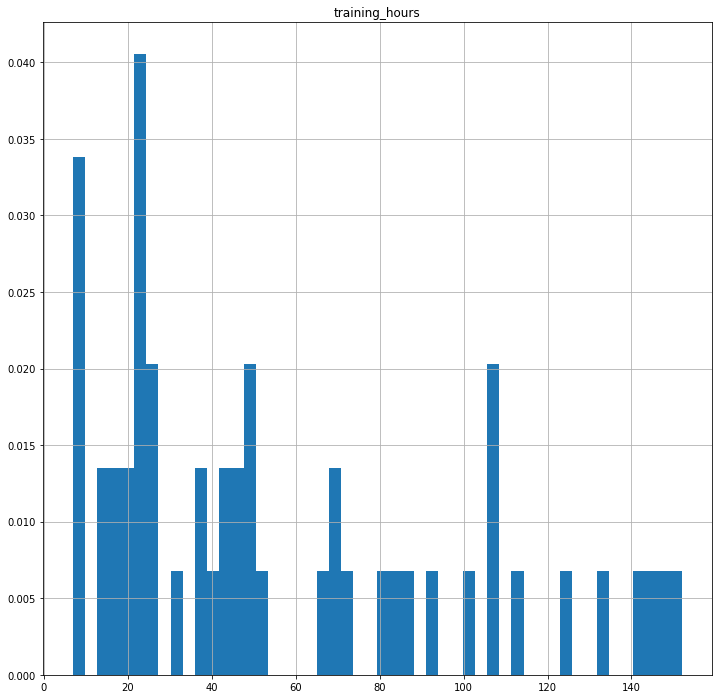

In [11]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot:>

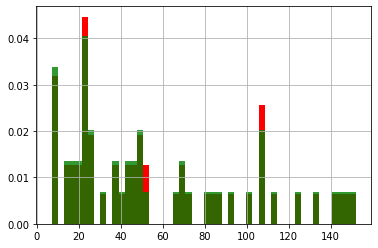

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

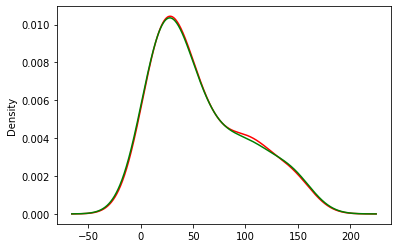

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

In [15]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0


In [17]:
new_df

,enrolled_university,education_level,training_hours
0,no_enrollment,Graduate,36.0
1,no_enrollment,Graduate,47.0
2,Full time course,Graduate,83.0
4,no_enrollment,Masters,8.0
5,Part time course,Graduate,24.0
6,no_enrollment,High School,24.0
7,no_enrollment,Graduate,18.0
8,no_enrollment,Graduate,46.0
9,no_enrollment,Graduate,123.0
10,Full time course,High School,32.0


In [18]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.750000,0.764706
Full time course,0.125000,0.137255
Part time course,0.089286,0.098039


In [19]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.642857,0.647059
Masters,0.160714,0.176471
High School,0.142857,0.156863
Phd,0.017857,0.019608
